In [5]:
from avl_tree import AVLTree, Node
from redblack_tree import RedBlackTree, Node

import time
import numpy as np
import pandas as pd
import random
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Funções utilizadas

In [6]:
def operation(arr, func):
    timespent = []
    for values in arr:
        t0 = time.time()
        for value in values:
            func(value)
        t1 = time.time()
        timespent.append(t1 - t0)
    
    return timespent

def get_timespent_array(arr, AVLfunc, RBfunc):
    timespent = [[], []]

    for i in range(1,20):
        timespent[0] = operation(arr, AVLfunc)
        timespent[1] = operation(arr, RBfunc)

    return timespent


def plot(xAxis, yAxisArray, title, operacao):
    plt.plot(xAxis, np.array(yAxisArray[0]), label="AVL Tree", color="blue")
    plt.plot(xAxis, np.array(yAxisArray[1]), label="Red-Black Tree", color="red")

    plt.legend(loc='upper left')
    plt.ylabel('Tempo Gasto',fontsize=15)
    plt.xlabel('Número de ' + operacao,fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()
    
def vector_unsorted(vector_len):
    vector_desorganized =[]
    for each in range(vector_len):
        vector_desorganized.append(randint(0,999))
    return vector_desorganized

def timespent_generate_tree(tree, tree_size):
    inlist = vector_unsorted(tree_size)
    t0 = time.time()
    for i in inlist:
        tree.add(i)
    t1 = time.time()
    
    return t1 - t0

## Tempo de criação, inserção e remoção em pequenas árvores

In [7]:
rb_tree = RedBlackTree()
avl_tree = AVLTree()

avl_timespent = timespent_generate_tree(avl_tree, 100)
rb_timespent = timespent_generate_tree(rb_tree, 100)

print(f'Tempo para montagem de uma Árvore AVL: {avl_timespent}')
print(f'Tempo para montagem de uma Árvore Vermelho e Preto: {rb_timespent}')

Tempo para montagem de uma Árvore AVL: 0.0023658275604248047
Tempo para montagem de uma Árvore Vermelho e Preto: 0.0007040500640869141


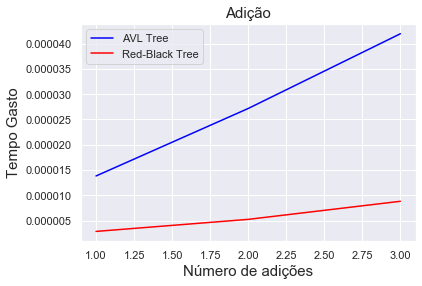

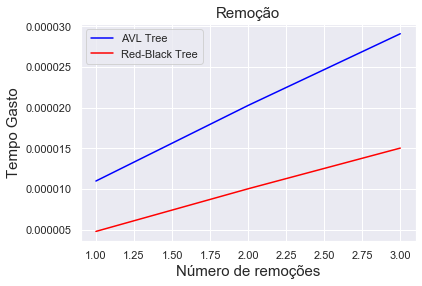

In [8]:
xAxis = [1,2,3]

timespent_to_insert = get_timespent_array([[110], [190, 130], [170, 220, 140]], avl_tree.add, rb_tree.add)
plot(xAxis, timespent_to_insert, 'Adição', 'adições')

timespent_to_remove = get_timespent_array([[5], [7, 2], [6, 3, 4]], avl_tree.delete, rb_tree.delete)
plot(xAxis, timespent_to_remove, 'Remoção', 'remoções')

## Tempo de criação, inserção e remoção em grandes árvores

In [9]:
rb_tree = RedBlackTree()
avl_tree = AVLTree()

avl_timespent = timespent_generate_tree(avl_tree, 100000)
rb_timespent = timespent_generate_tree(rb_tree, 100000)

print(f'Tempo para montagem de uma Árvore AVL: {avl_timespent}')
print(f'Tempo para montagem de uma Árvore Vermelho e Preto: {rb_timespent}')

Tempo para montagem de uma Árvore AVL: 1.722391128540039
Tempo para montagem de uma Árvore Vermelho e Preto: 0.33704495429992676


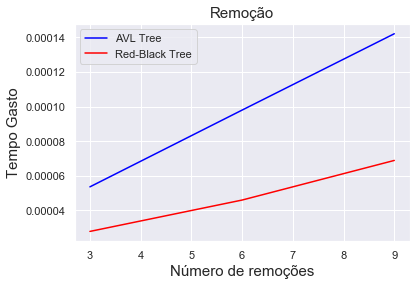

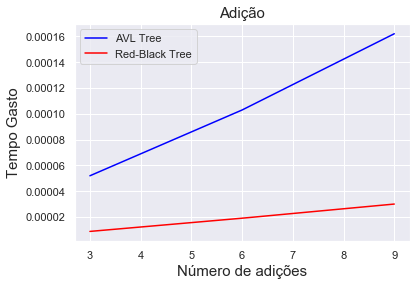

In [10]:
xAxis = [3,6,9]

timespent_to_remove = get_timespent_array([[50, 150, 60000], [700, 20, 30000, 605, 78099, 12113], [3, 86540, 765, 1023, 10765, 54, 712, 999, 70]], avl_tree.delete, rb_tree.delete)
plot(xAxis, timespent_to_remove, 'Remoção', 'remoções')

timespent_to_insert = get_timespent_array([[50, 150, 60000], [700, 20, 30000, 605, 78099, 12113], [3, 86540, 765, 1023, 10765, 54, 712, 999, 70]], avl_tree.add, rb_tree.add)
plot(xAxis, timespent_to_insert, 'Adição', 'adições')